In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import mpltern
from matplotlib import rc
rc('text', usetex=True)
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
plt.rcParams.update({'font.size': 20})

import pdb
import numpy as np

import sys
if '../' not in sys.path:
    sys.path.append('../')
from expts.phasemodelling import twod_precomputed, phase
from solvers.utils import makegrid2d

In [12]:
grid = np.asarray(makegrid2d(num=30))

In [13]:
M = np.array([1,1])
chisp = 3
CHI = np.array([[0,chisp],[chisp,0]])
M,CHI

(array([1, 1]), array([[0, 3],
        [3, 0]]))

In [14]:
curvature,energy,pcspinodal, pcenergy = [],[],[],[]

def flory_huggins(x, M,CHI,beta=1e-4):
    T1 = 0
    for i,xi in enumerate(x):
        T1 += (xi*np.log(xi))/M[i] + beta/xi
    T2 = 0.5*np.matmul((np.matmul(x,CHI)),np.transpose(x)) 
    
    return T1+T2

for point in grid:
    energy.append(flory_huggins(point, M,CHI,beta=1e-4))

# TODOS

* Concave up should have negative definite Hessian (i.e. a maximum) which is not the case with the curve above

In [15]:
# Convex Hull based method to find binodal curve
from scipy.spatial import ConvexHull
points = np.concatenate((grid[:,1].reshape(-1,1),np.asarray(energy).reshape(-1,1)),axis=1)
hull = ConvexHull(points)

[[0.001 0.999]
 [0.999 0.001]]


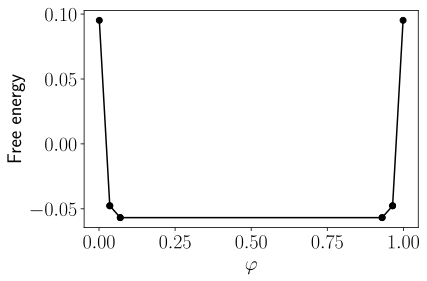

In [20]:
#plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    if np.sum(np.isclose(grid[simplex].tolist(),0.0,atol=1e-3))==2:
        print(grid[simplex])
        continue
    plt.plot(points[simplex, 0], points[simplex, 1], 'ko-')
plt.xlabel(r'$\varphi$')
plt.ylabel('Free energy')
plt.show()